In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/insurance.csv')

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### EDA & Visualization

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Clearly data do not contain any NULL values

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### There is large standard deviation- '12110' and quite high range (min-max) of 'charges'

In [ ]:
## Let check for duplicates row if any:
data.drop_duplicates(inplace =True)
data.shape

(1337, 7)

####So there was one duplicated row, which has been dropped now

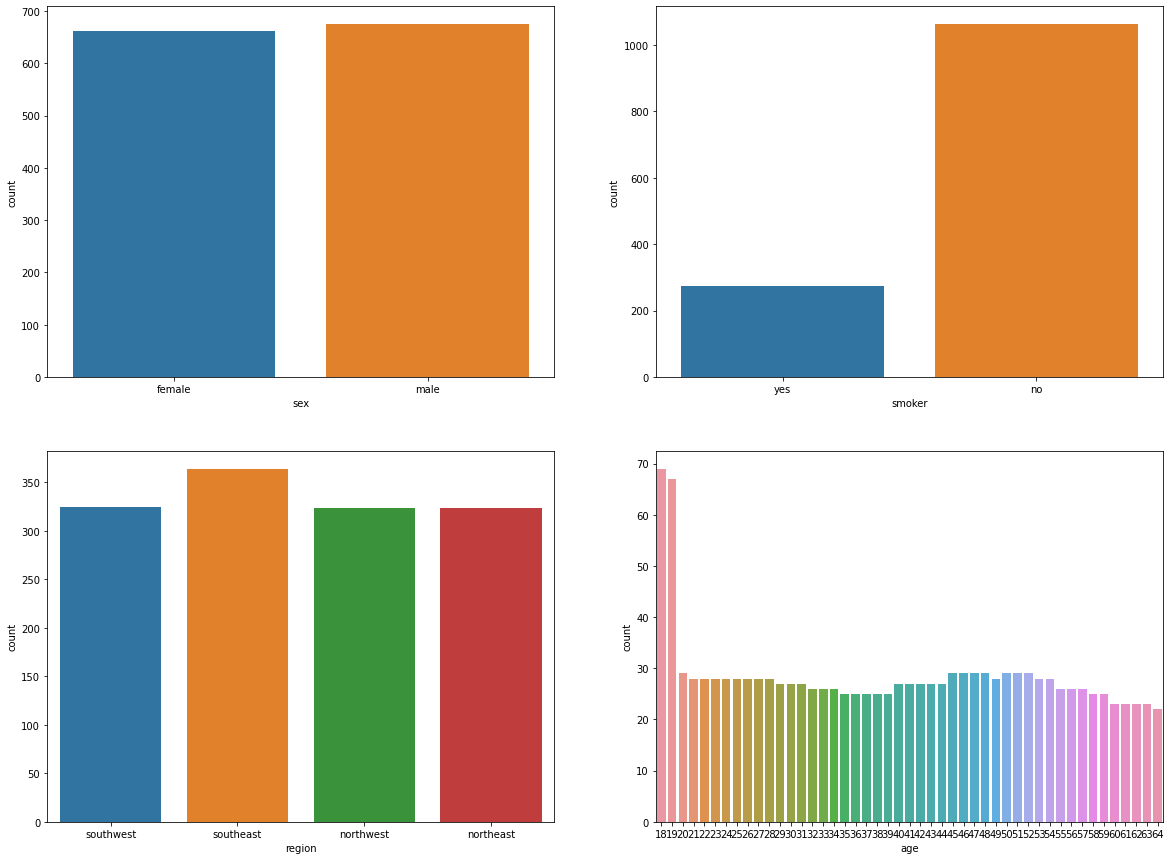

In [ ]:
# Creating 'Count Plot':
fig,axes = plt.subplots(2,2,figsize=(20,15))

sns.countplot(data=data, x='sex',ax=axes[0,0])
sns.countplot(data=data, x='smoker',ax=axes[0,1])
sns.countplot(data=data, x='region',ax=axes[1,0])
sns.countplot(data=data, x='age',ax=axes[1,1])

plt.show()


#### <ul>
<li> In the case of 'gender' & 'region', there are almost equal number of samples of each class</li>
<li> Samples with 'no' smoking are almost 4 times the one with 'yes' smoking</li>
<li>There are large number of individuals in the age group (18-19) </li>


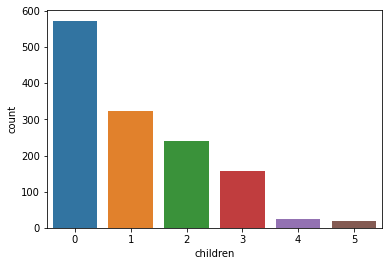

In [ ]:
sns.countplot(x='children',data=data)
plt.show()

##### There are more individuals in the medical list who have no children and this can help us in treating outliers

#### Let have a look on the correlation between different features

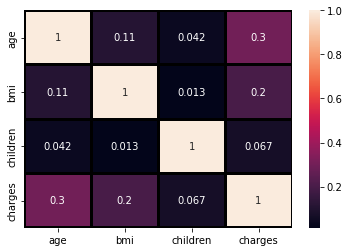

In [ ]:
correlation = data.corr()
sns.heatmap(correlation,linecolor='black',linewidth=2,annot =True)

##### <li> There is very small correlation among features, so no need to drop any of the feature </li>
##### <li> 'age' & 'bmi' show higher correlation with target variable ('charges') as compare to other features</li>


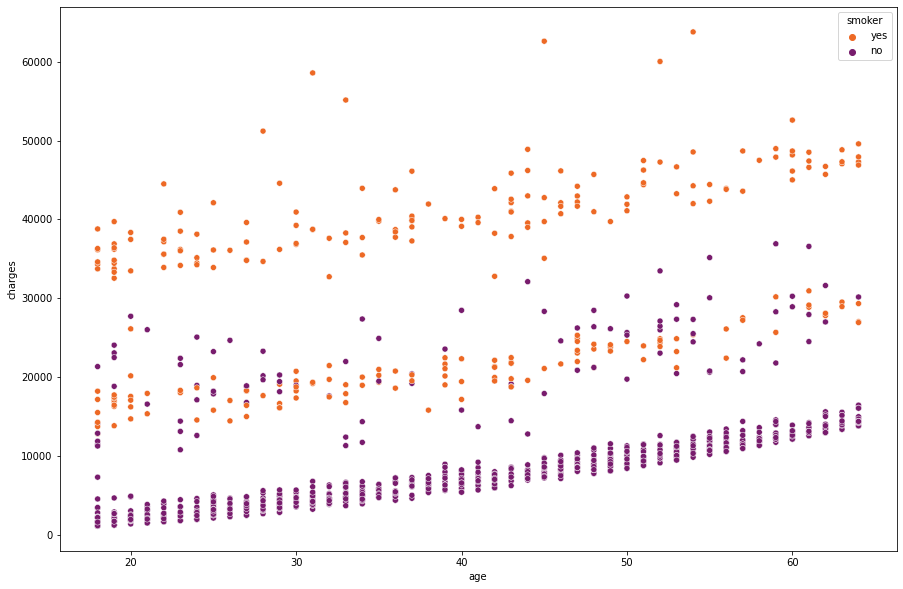

In [ ]:
fig, ax =plt.subplots(1,1,figsize=(15,10))
sns.scatterplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r')

plt.show()

##### <li> Individuals who are smokers have comparably large charges </li>
##### <li> With increases in age charges are increasing, but rate of increase is small. This can be obvious as with age, health problem increases, so charges will also increase</li>  


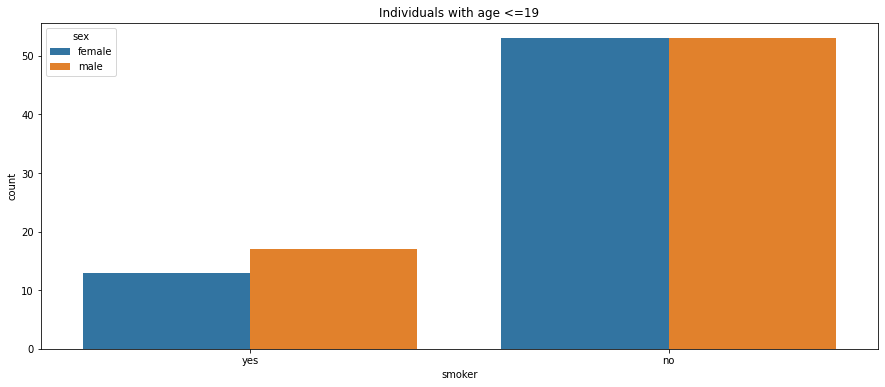

In [ ]:
## As there are more number of individuals in the age groups(18-19), lets find out does smoking is the reason of being patient at very young age?
fig, axes =plt.subplots(1,1,figsize=(15,6))
sns.countplot(x='smoker', data=data[data['age']<=19],hue='sex').set(title = 'Individuals with age <=19')
plt.show()

##### Within age group (18-19) ~25% of individuals are smokers & have comparable number of males & females. Clearly, gender is not playing significant role because both type of classes are showing similar results

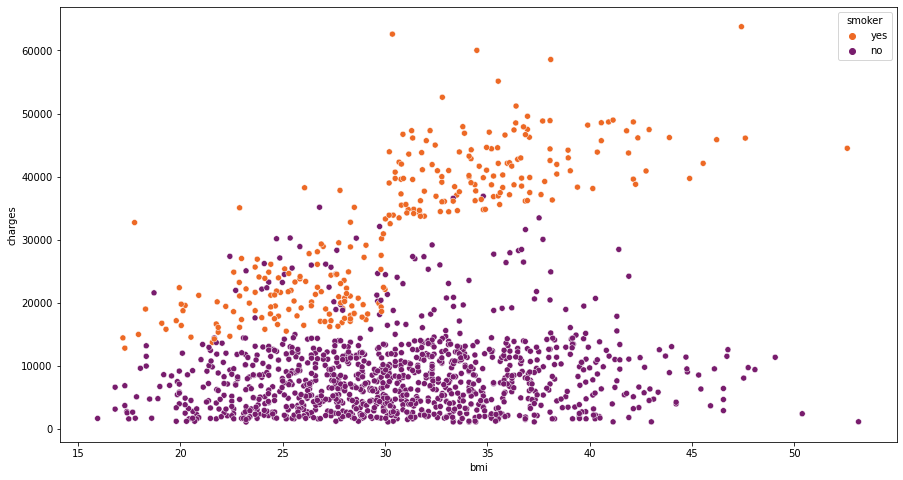

In [ ]:
fig, ax =plt.subplots(1,1,figsize=(15,8))
sns.scatterplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'inferno_r')
plt.show()

##### For smokers, there seems to be linear correlation betweeen bmi & charges while for no smokers there is almost no correlation between bmi & charges

### It is clear from the above plots that age group-(18-19) & individuals who smoke have greater impact on charges

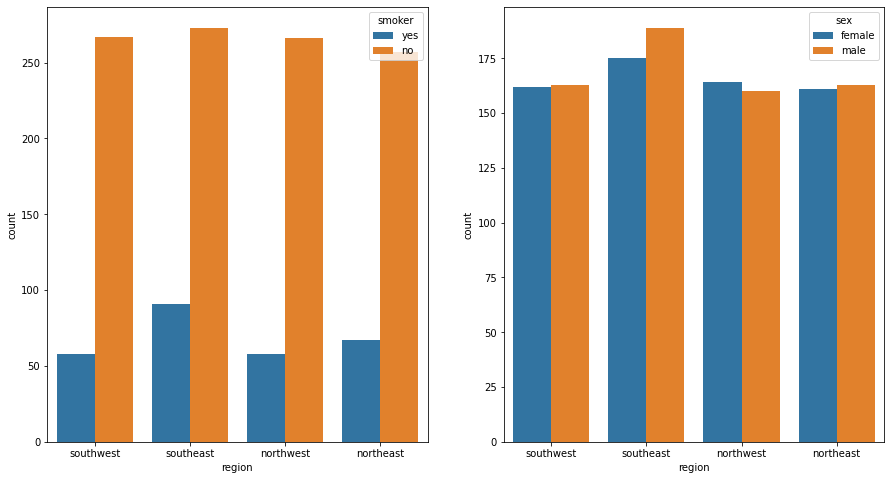

In [ ]:
fig, axes =plt.subplots(1,2,figsize=(15,8))
sns.countplot(x='region', data=data,hue = 'smoker',ax=axes[0])
sns.countplot(x='region', data=data,hue = 'sex',ax=axes[1])
plt.show()

#### 'Southeast' region have more number of smokers: it have ~25% of population as smoker while other regions have 20% of population as smoker 

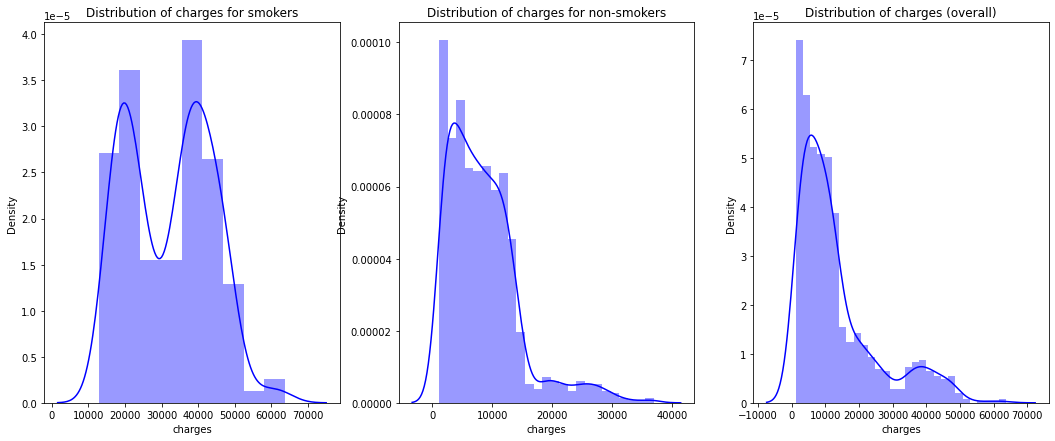

In [ ]:
### Distribution of 'charges'
import warnings
warnings.filterwarnings("ignore")
fig,axes = plt.subplots(1,3,figsize=(18,7))
sns.distplot(data[data['smoker']=='yes']['charges'],color='b',ax = axes[0]).set(title='Distribution of charges for smokers')
sns.distplot(data[data['smoker']=='no']['charges'],color='b',ax = axes[1]).set(title='Distribution of charges for non-smokers')
sns.distplot(data['charges'],color='b',ax = axes[2]).set(title='Distribution of charges (overall)')
plt.show()

#### clearly in the overall distribution of 'charges', positive skewness is observed, so lets do the 'log' transformation to get rid of skewness

In [ ]:
data['charges'] = np.log(data['charges'])

#### Outliers

In [ ]:
from scipy.stats import kurtosis

In [ ]:
print("Kurtosis of distribution of Age: {:.04}".format(kurtosis(data['age'])))
print("Kurtosis of distribution of bmi: {:.04}".format(kurtosis(data['bmi'])))
print("Kurtosis of distribution of Charges: {:.04}".format(kurtosis(data['charges'])))


Kurtosis of distribution of Age: -1.244
Kurtosis of distribution of bmi: -0.05723
Kurtosis of distribution of Charges: -0.6367


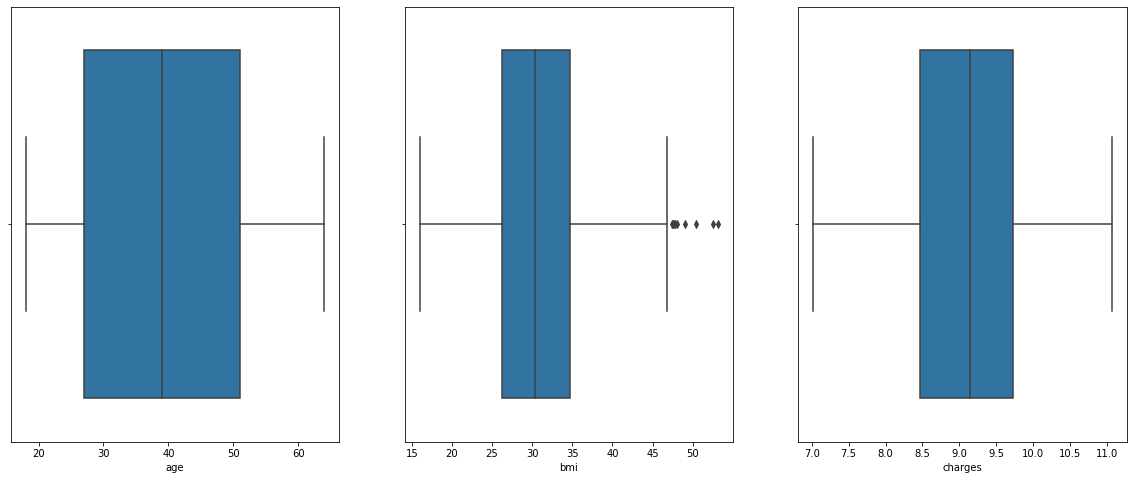

In [ ]:
fig, axes =plt.subplots(1,3,figsize=(20,8))
sns.boxplot(x='age', data=data,ax=axes[0])
sns.boxplot(x='bmi', data=data,ax=axes[1])
sns.boxplot(x='charges', data=data,ax=axes[2])

plt.show()

#### Clearly some outliers are present in 'bmi' class & from the count plots(at the beginning), there are very few instances where children number is greater than or equal to 4, So let remove these oultiers

In [ ]:
df = data[(data.bmi>48)|(data.children>=4)].index
data.drop(df,inplace=True)

In [ ]:
data.shape

(1289, 7)

### Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
strip_columns= ['sex','region','smoker']
labeler = LabelEncoder()
for item in strip_columns:
    data[item] = labeler.fit_transform(data[item])

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,9.734176
1,18,1,33.770,1,0,2,7.453302
2,28,1,33.000,3,0,2,8.400538
3,33,1,22.705,0,0,1,9.998092
4,32,1,28.880,0,0,1,8.260197


#### Standardise the data

In [ ]:
X = data.drop('charges',axis =1)
Y= data["charges"]

In [ ]:
# Let Standardize the data, it helps to ease calculations
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

### Prepare the training & testing data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting in 70-30 ratio:
X_train ,X_test ,Y_train, Y_test =  train_test_split(X,Y,test_size=0.30,random_state=42,shuffle=True)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(902, 6) (387, 6) (902,) (387,)


### Building Model

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [ 0.49906116 -0.03837825  0.0702649   0.11411415  0.62245996 -0.06587404]
Intercept: 9.09314700859359


In [ ]:
mse =mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print('Mean squared error (MSE):  {:.2f}'.format(mse))
print('Root Mean squared error (RMSE): {:.2f}'.format(np.sqrt(mse)))
print('r2 score : {:.2f}'.format(r2))



Mean squared error (MSE):  0.20
Root Mean squared error (RMSE): 0.44
r2 score : 0.77


### Prediction & Calculating Test error

In [ ]:
error  = 100*(Y_pred-Y_test)/Y_test
Prediction_df = pd.DataFrame({'Actual Test Values': Y_test.squeeze(), 'Predicted Test Values': Y_pred.squeeze(), '% Error': error.squeeze()})
Prediction_df.head(10)

,Actual Test Values,Predicted Test Values,% Error
1163,7.696590,8.014372,4.128862
1228,9.268064,9.235192,-0.354681
479,7.508944,8.045978,7.151935
85,9.956960,10.518411,5.638785
65,7.463486,7.878605,5.562003
128,10.396175,10.075174,-3.087689
468,10.055733,8.430472,-16.162536
1078,10.453692,9.744272,-6.786312
747,7.394667,7.837513,5.988725
45,9.934515,9.173750,-7.657800


### Computing Training error

In [ ]:
Y_predict_2 = model.predict(X_train)
mse =mean_squared_error(Y_train, Y_predict_2)
r2 = r2_score(Y_train, Y_predict_2)
print('Mean squared error (MSE):  {:.2f}'.format(mse))
print('Root Mean squared error (RMSE): {:.2f}'.format(np.sqrt(mse)))
print('r2 score : {:.2f}'.format(r2))

Mean squared error (MSE):  0.20
Root Mean squared error (RMSE): 0.45
r2 score : 0.77


In [ ]:
error_2 = 100*(Y_predict_2-Y_train)/Y_train
Prediction_df2 = pd.DataFrame({'Actual Train Values': Y_train.squeeze(), 'Predicted Train Values': Y_predict_2.squeeze(), '% Error': error_2.squeeze()})
Prediction_df2.head(10)

,Actual Train Values,Predicted Train Values,% Error
875,7.897339,8.130396,2.951081
1327,9.146112,9.114786,-0.342501
1003,9.963273,8.835853,-11.315760
818,10.060547,10.655462,5.913346
40,8.021605,8.207668,2.319526
30,10.479696,9.518280,-9.174077
250,9.459499,9.557358,1.034508
695,8.071295,8.377987,3.799790
1077,7.650770,8.018110,4.801344
141,8.157814,8.378772,2.708540


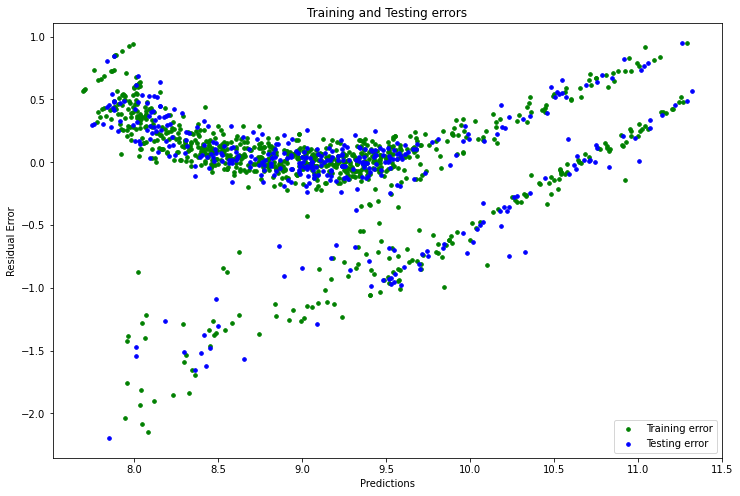

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(Y_predict_2, Y_predict_2 - Y_train,color = "green", s = 13,label = 'Train data')
plt.scatter(Y_pred, Y_pred- Y_test,  color = "blue", s = 13,label = 'Test data' )
plt.xlabel('Predictions')
plt.ylabel('Residual Error')
plt.title("Training and Testing errors")
plt.legend(['Training error','Testing error'])
plt.show()

<li> Residual error is small, which indicates the good accuracy of model</li>
<li> Errors across training & unseen test dataset seems to be identical which indicates 'generalization' of model</li>

#### Taking anti-log of the final predicted values will give orignal 'charges'